# <center>Network Science</center>

**Due Date:** 08.05.2020 18:00 <br>
**Late submission policy:** -1 points per day <br>


Please send your reports to <iakarpov@hse.ru> with message subject of the following structure: <br>
**[HSE SNA Magolego 2020] *{LastName}* *{First Name}* HW_*{Number}***

Support your computations with figures and comments. <br>
If you are using IPython Notebook you may use this file as a starting point of your report.

### Task 1. Data preparation

<img src ="https://dl.dropboxusercontent.com/s/nt1tbmathgo3gg8/g1.png?dl=1" style="width:600px;heigth:200px">

1.1. Load [VKontakte](https://dl.dropboxusercontent.com/s/8eo1sjfhu5spb0f/vk.tsv?dl=1) dataset to NetworkX <br>
1.2. Choose 3-5 nodes from the existing network and create the subgraph with network framing (only `seed` and `friends#1` nodes, only `r0`, `r1`, `r2` edges) <br>
1.3. Find graph diameter, average and global clustering coefficient <br>
1.4. Find max and mean values of incoming and outcoming node degrees <br>
1.5. Vizualize your graph in gephi, networkX and grahistry <br>


1.1. Load VKontakte dataset to NetworkX 

In [1]:
#загрузка необходимых для работы библиотек

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
# загрузка данных
df = pd.read_csv('vk.tsv',sep = '\t')
df.head()

Unnamed: 0      Friends           ID            Name 
0           0   VK_4766099  VK_97803804  Никита Кузнецов
1           1   VK_5227712  VK_97803804  Никита Кузнецов
2           2  VK_11047376  VK_97803804  Никита Кузнецов
3           3  VK_11079816  VK_97803804  Никита Кузнецов
4           4  VK_14492163  VK_97803804  Никита Кузнецов

In [3]:
# смотрю на название колонок
df.columns

Index(['Unnamed: 0', 'Friends', 'ID', 'Name '], dtype='object')

In [4]:
# удаляю ненужные пробелы в наименовании таблиц
df.columns = df.columns.str.strip() 
df.columns

Index(['Unnamed: 0', 'Friends', 'ID', 'Name'], dtype='object')

1.2. Choose 3-5 nodes from the existing network and create the subgraph with network framing (only seed and friends#1 nodes, only r0, r1, r2 edges) 

In [5]:
# выводим уникальные ID
ids = list(df["ID"].unique())

In [6]:
# формируем уникальный датасет с ID
df1=df[df.ID.astype(str).isin(['VK_65606427', 'VK_382481084', 'VK_15945852' , 'VK_43555697'])]

In [7]:
# выводим уникальный список друзей
list(df1["Name"].unique())

['Полина Быкова', 'Rišards Jurans', 'Михаил Жиляков', 'Лена Рыбкина']

In [8]:
# смотрим на наш "уникальный" датасет 
df1=df1[df1.ID.astype(str).isin(ids)]
df1.head()

Unnamed: 0     Friends           ID           Name
682         682    VK_14603  VK_65606427  Полина Быкова
683         683   VK_369694  VK_65606427  Полина Быкова
684         684   VK_498989  VK_65606427  Полина Быкова
685         685  VK_1231116  VK_65606427  Полина Быкова
686         686  VK_1499191  VK_65606427  Полина Быкова

In [9]:
# формируем edge нулевого уровня
r0_edge = df1[['ID', 'Friends']]
r0_edge.head()

ID     Friends
682  VK_65606427    VK_14603
683  VK_65606427   VK_369694
684  VK_65606427   VK_498989
685  VK_65606427  VK_1231116
686  VK_65606427  VK_1499191

In [10]:
# формируем nodes
r0 = df1[['ID','Name']]
r0 = r0.drop_duplicates()

In [11]:
r0

ID            Name
682     VK_65606427   Полина Быкова
3468   VK_382481084  Rišards Jurans
3960    VK_15945852  Михаил Жиляков
46000   VK_43555697    Лена Рыбкина

In [12]:
# выводим уникальные Friends
friends_uniq = list(df1["Friends"].unique())
# friends_uniq

In [13]:
# формируем nodes первого уровня
r1_1=df[df.ID.astype(str).isin(friends_uniq)]
r1 =r1_1[['ID','Name']] 
r1 =r1.drop_duplicates()

In [14]:
# выводим резулььтат
r1_1.head()

Unnamed: 0     Friends           ID           Name
682         682    VK_14603  VK_65606427  Полина Быкова
683         683   VK_369694  VK_65606427  Полина Быкова
684         684   VK_498989  VK_65606427  Полина Быкова
685         685  VK_1231116  VK_65606427  Полина Быкова
686         686  VK_1499191  VK_65606427  Полина Быкова

In [15]:
# формируем edges первого уровня
r1_edge = r1_1[['ID', 'Friends']]
r1_edge.head()

ID     Friends
682  VK_65606427    VK_14603
683  VK_65606427   VK_369694
684  VK_65606427   VK_498989
685  VK_65606427  VK_1231116
686  VK_65606427  VK_1499191

In [16]:
# собираем edge 0 и edge 1 в один датасет
r_total = r0_edge.append(r1_edge)
r_total.head()

ID     Friends
682  VK_65606427    VK_14603
683  VK_65606427   VK_369694
684  VK_65606427   VK_498989
685  VK_65606427  VK_1231116
686  VK_65606427  VK_1499191

In [17]:
# собираем r0 и r1 в один датасет
r_total_edge = r0.append(r1)
r_total_edge.head()

ID            Name
682     VK_65606427   Полина Быкова
3468   VK_382481084  Rišards Jurans
3960    VK_15945852  Михаил Жиляков
46000   VK_43555697    Лена Рыбкина
682     VK_65606427   Полина Быкова

In [18]:
# сохраняем данные для работы гепфи
r_total.to_csv('r_total_gephi.csv', sep=',')

In [19]:
# сохраняем данные для работы гепфи
r_total_edge.to_csv('r_total_edge_gephi.csv', sep=',')

In [21]:
# данные для сети
G_small = nx.Graph()
count = 0

node_set = set()
#pbar = tqdm(total=len(df_2795), desc='nodes')
for index, row in df1.iterrows():
    if row["ID"] not in G_small.nodes():
        G_small.add_node(row["ID"], attr_dict = {'Name':row["Name"]})
    #pbar.update(1)
#pbar = tqdm(total=len(df_2795), desc='edges')
for index, row in df1.iterrows():
    if (row["ID"], row["Friends"]) not in G_small.edges() and (row["Friends"], row["ID"]) not in G_small.edges():
        G_small.add_edge(row["ID"], row["Friends"])    
    #pbar.update(1)

In [22]:
# параметры
print(nx.info(G_small))
print ("Number of connected components", nx.number_connected_components(G_small))

Name: 
Type: Graph
Number of nodes: 2840
Number of edges: 27931
Average degree:  19.6697
Number of connected components 1


//anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


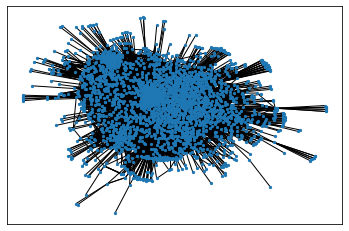

In [23]:
# визуализируем сеть
pos = nx.spring_layout(G_small)
nx.draw_networkx(G_small, pos = pos, with_labels=False, node_size = 5)

In [24]:
# matplotlib.rcParams.update({'font.size': 22})
lbls =  {n: df1["Name"]+n[:2] for n, d in G_small.nodes(data=True)}
# lbls

1.3. Find graph diameter, average and global clustering coefficient 

In [ ]:
# Найдем диаметр и среднее.
largest_component = max(nx.connected_components(G_small), key=len)
G2 = G_small.subgraph(largest_component)
print("Diameter of connected component -", nx.diameter(G2))
print("Average clustering coefficient - {:.2f}".format(nx.average_clustering(G2)), "\n")

In [26]:
# set up the coord
coord = nx.spring_layout(G_small, k = 0.15)

(-0.95, 1.05, -1.0, 0.75)

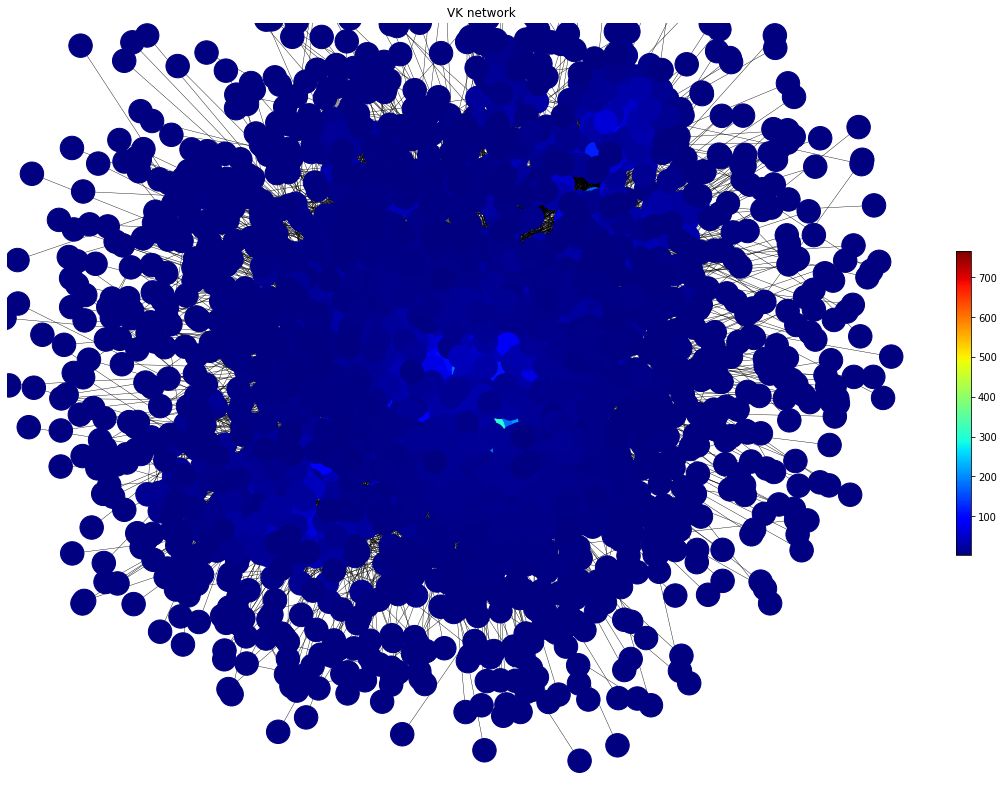

In [27]:
plt.figure(figsize=(20,14))
# k = nx.degree(G_small)
k = dict (G_small.degree ())
# print(k)
# set nodes' colors according to their degrees:
node_colors = list(k.values())

nodes = nx.draw_networkx_nodes(G_small, pos = coord, 
                               node_color=node_colors, 
                               node_size = 550, 
                               nodelist=list(k.keys()),                
                               with_labels = False,
                               cmap = 'jet')
edges = nx.draw_networkx_edges(G_small, pos = coord, width = .4)

# the borders can be then reduced to zoom in the graph:
plt.xlim([-.95, 1.05])
plt.ylim([-1., .75])
# add colorbar to see which nodes have the highest degrees:
plt.colorbar(nodes, shrink = .4, pad = .0005, aspect = 20)
plt.title('VK network')
plt.axis("off")

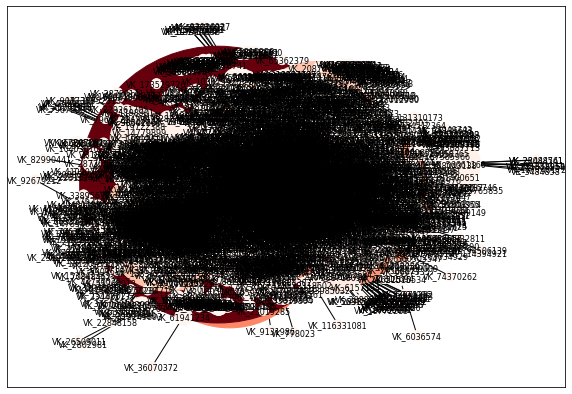

In [28]:
k = nx.degree(G_small)
plt.figure(1, figsize=(10,7))
coord = nx.spring_layout(G_small)
nx.draw_networkx(G_small,
                 pos=coord,
                 nodelist=list(dict(k).keys()),
                 node_size = [d*100 for d in list(dict(k).values())],
                 node_color=list(dict(k).values()),
                 font_size=8,
                 cmap=plt.cm.Reds,
                 )

In [29]:
# function to create proper histogram in matplotlib:
def plot_hist(data, colormap, alpha, bins = 10, round_value = 1):
    cm = plt.cm.get_cmap(colormap)
    counts, bins, patches = plt.hist(data, alpha = alpha, color = 'Blue', bins = bins)
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    plt.xticks(bins.round(round_value))
    col = bin_centers - min(bin_centers)
    col /= max(col)
    # use various colors for different bins:
    for c, p in zip(col, patches):
        plt.setp(p, 'facecolor', cm(c))
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)

1.4. Find max and mean values of incoming and outcoming node degrees 

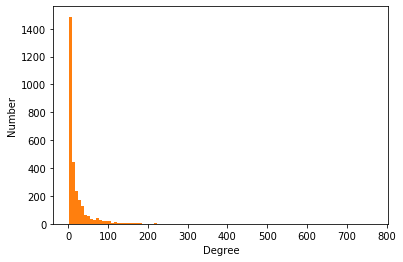

Diameter: 7
Clustering Coefficient: 0.26191457683671443
Average clustering coefficient - 0.35 

Max degree: 766
Mean degree 19.669718309859157
Number of vertices: 2840
Number of edges: 27931
Number of connected components 1


In [30]:
# function for metrics from your code (descriptive statistics)
# let us set up some variables before we can get write a fucntion

degrees_dictionary = dict(G_small.degree())
degrees = np.array(list(dict(G_small.degree()).values()))

# node degrees

plt.xlabel('Degree')
plt.ylabel('Number')
plt.hist(degrees, 100)

# function itself

def get_metrics(graph):
    dginfo = list(dict((x, y) for x, y in nx.degree(graph)).values())
    gm = list(graph.subgraph(c) for c in nx.connected_components(graph))
    gm.sort(key=lambda c: c.size(), reverse=True)
    # degrees, max, mean, diameter, cc    
    return dginfo, max(dginfo), np.mean(dginfo), nx.diameter(gm[0]), nx.transitivity(graph)

dgrs, max_d, mean_d, g_dm, clust_c = get_metrics(G_small)

# show node degrees
plt.xlabel('Degree')
plt.ylabel('Number')
plt.hist(dgrs, 100)
plt.show()

print ("Diameter:", g_dm)
print ("Clustering Coefficient:", clust_c)

largest_component = max(nx.connected_components(G_small), key=len)
G_small2 = G_small.subgraph(largest_component)

# summary for statistics
print("Average clustering coefficient - {:.2f}".format(nx.average_clustering(G2)), "\n")
print('Max degree:', max(degrees))
print('Mean degree', np.mean(degrees))
print('Number of vertices:', G_small.number_of_nodes())
print('Number of edges:',G_small.number_of_edges())
print('Number of connected components', nx.number_connected_components(G_small))

### Task 2. Power Law
2.1. Check that Zipf's Law holds <br>

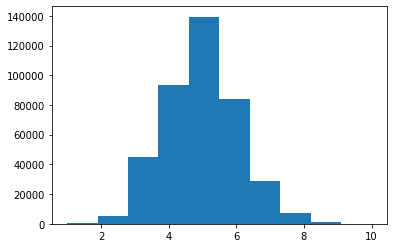

In [31]:
# Закон Зипфа проверен, однако я не понимаю, как его можно подключить к ВК

CC = sorted(nx.connected_components(G_small), key = len, reverse=True)

import random
cc0 = np.array(list(CC[0]))
subG = G_small.subgraph(np.random.choice(cc0, 1000))

shortest_paths = nx.shortest_path(subG)
lengths = []
for target, paths in shortest_paths.items():
    for k, value in paths.items():
        lengths.append(len(value))

plt.hist(lengths, 10)
plt.show()

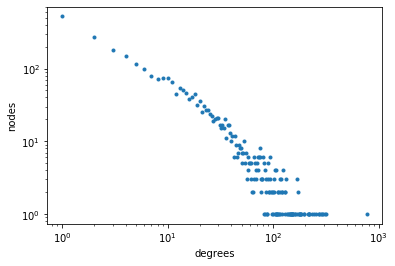

In [32]:
# должна была быть визуализация степени узлов, но что-то не тк
from collections import Counter
d = Counter(degrees)
plt.xlabel('degrees')
plt.ylabel('nodes')
plt.loglog(list(d.keys()), list(d.values()), '.', lw=10)
plt.show()

In [33]:
# Находим альфу. определение альфы является одной из самых важных вещей в понятии степень
def get_alpha(x_min):
    new_degrees = []
    for degree in degrees:
        if degree >= x_min:
            new_degrees.append(degree)

    n = len(new_degrees) + 0.0
    
    alpha = 0.0
    for degree in new_degrees:
        alpha = alpha + (np.log(degree / x_min))

    alpha = 1 + n / alpha
    
    return alpha

In [34]:
# оцениваем  альфа и сигму
x_min = 15.0
            
new_degrees = []
for degree in degrees:
    if degree >= x_min:
        new_degrees.append(degree)

n = len(new_degrees) + 0.0

alpha = 0.0
for degree in new_degrees:
    alpha = alpha + (np.log(degree / x_min))

alpha = 1 + n / alpha

alpha = get_alpha(x_min)
sigma = (alpha - 1) / np.sqrt(n)

print('Estimated alpha:', alpha)
print('and sigma squared:', sigma)

Estimated alpha: 2.12877043390664
and sigma squared: 0.035856574542235765


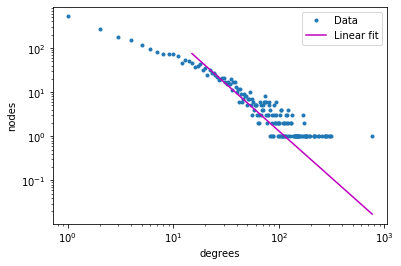

In [35]:
# создаем функцию для функции плотности вероятности
c = Counter(new_degrees)

C = (alpha - 1) * (x_min ** (alpha - 1))

def f(x):
    return C * (x ** (-alpha)) * n
x = np.arange(x_min, max(degrees), 1)

data, = plt.loglog(list(d.keys()), list(d.values()), '.', lw=2, label = 'Data')
fit,  = plt.loglog(x, f(x), 'm', label = 'Linear fit')
plt.xlabel('degrees')
plt.ylabel('nodes')
plt.legend(handles = [data, fit])
plt.show()

In [36]:
# define functions to compute model and experimental CDFS
d_dict = dict(d)

def f_exp(x, x_min):
    result = 0.0
    N = 0.0
    for degree, nodes in d_dict.items():
        if degree >= x_min:
            N += nodes
            if degree <= x:
                result += nodes
    return result / N


def f_model(x, x_min, alpha):
    return 1 - (x / x_min) ** (1 - alpha)

In [37]:
# this is for plot D(x_min)
D_cords = dict()

def calculate_D(x_min):
    array = []
    alpha = get_alpha(x_min)
    for degree in d_dict.keys():
        if degree >= x_min:
            result = np.abs(f_model(degree, x_min, alpha) - f_exp(degree, x_min))
            array.append(result)
            D_cords[x_min] = result
    return max(array)

temp = dict()
for degree in d_dict.keys():
    if degree < 628:    
        temp[degree] = calculate_D(degree + 0.0)

In [38]:
real_x_min = min(temp,key=temp.get) + 0.0
print(real_x_min)

real_alpha = get_alpha(real_x_min)
real_C = (real_alpha - 1) * (real_x_min ** (real_alpha - 1))

88.0


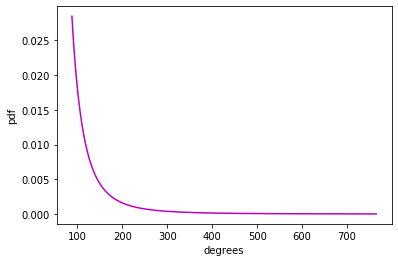

In [39]:
def pdf(x):
    return real_C * x ** (-real_alpha)
x = np.arange(real_x_min, max(degrees), 1)

plt.xlabel('degrees')
plt.ylabel('pdf')
plt.plot(x, pdf(x), 'm', label = 'PDF')
plt.show()

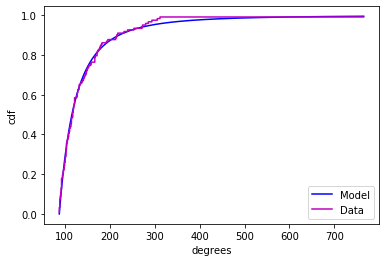

In [40]:
# кумулятивная функция распределения
def cdf(x):
    return 1 - (x / real_x_min) ** (1 - real_alpha)

model, = plt.plot(x, cdf(x), 'b', label = 'Model')
y = []
for point in x:
    y.append(f_exp(point, real_x_min))
data,  = plt.step(x, y, 'm', label = 'Data')
plt.xlabel('degrees')
plt.ylabel('cdf')
plt.legend(handles = [model, data])
plt.show()

### Task 3. Structural analysis

3.1. Print 5 nodes with maximum degree centrality, vizualize your graph with color or size as the function of degree <br>
3.2. Print 5 nodes with maximum betweenness centrality, vizualize your graph with color or size as the function of degree <br>
3.3. Print 5 nodes with maximum eigenvector centrality, vizualize your graph with color or size as the function of degree <br>
3.4 Print histogram with centralities distribution of your graph <br>

3.1. Print 5 nodes with maximum degree centrality, vizualize your graph with color or size as the function of degree 

Degree Centrality 

In [41]:
# take only giant connected component for the further analysis: 
Gc = max(nx.connected_component_subgraphs(G_small), key=len)
print("Number of nodes -", len(Gc.nodes()))
print("Number of edges -", len(Gc.edges()))

Number of nodes - 2840
Number of edges - 27931


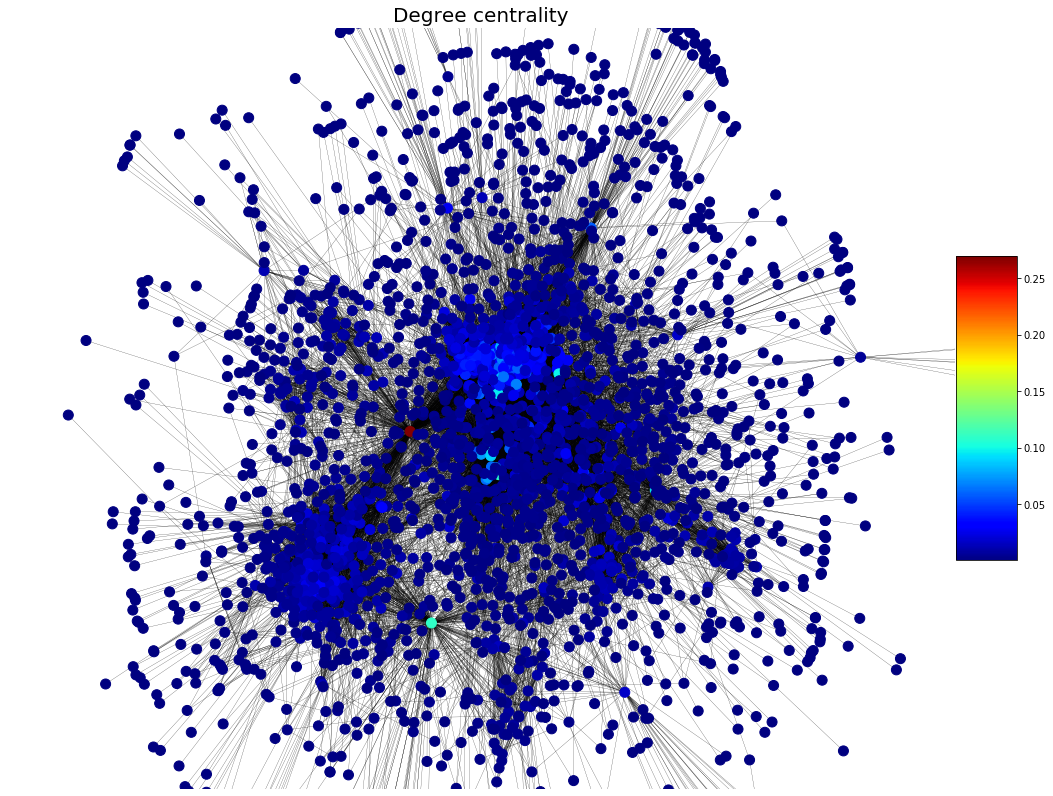

In [42]:
# строим степень централизованности
plt.figure(figsize=(20,14))
degree_centr = nx.degree_centrality(Gc)
node_colors = list(degree_centr.values())

nodes = nx.draw_networkx_nodes(Gc, pos = coord, 
                               node_color=node_colors,
                               node_size = 100,
                               nodelist=list(degree_centr.keys()),
                               cmap = 'jet',
                               with_labels = False)
edges = nx.draw_networkx_edges(Gc, pos = coord, width = .2)
plt.xlim([-.95, .9])
plt.ylim([-.5, .6])
plt.colorbar(nodes, shrink=.4, pad=.0005, aspect=5)
plt.title('Degree centrality', fontsize = 20)
plt.axis("off")

top_nodes = sorted(degree_centr, key = degree_centr.get)[-3:]

3.2. Print 5 nodes with maximum betweenness centrality, vizualize your graph with color or size as the function of degree 

Betweenness centrality

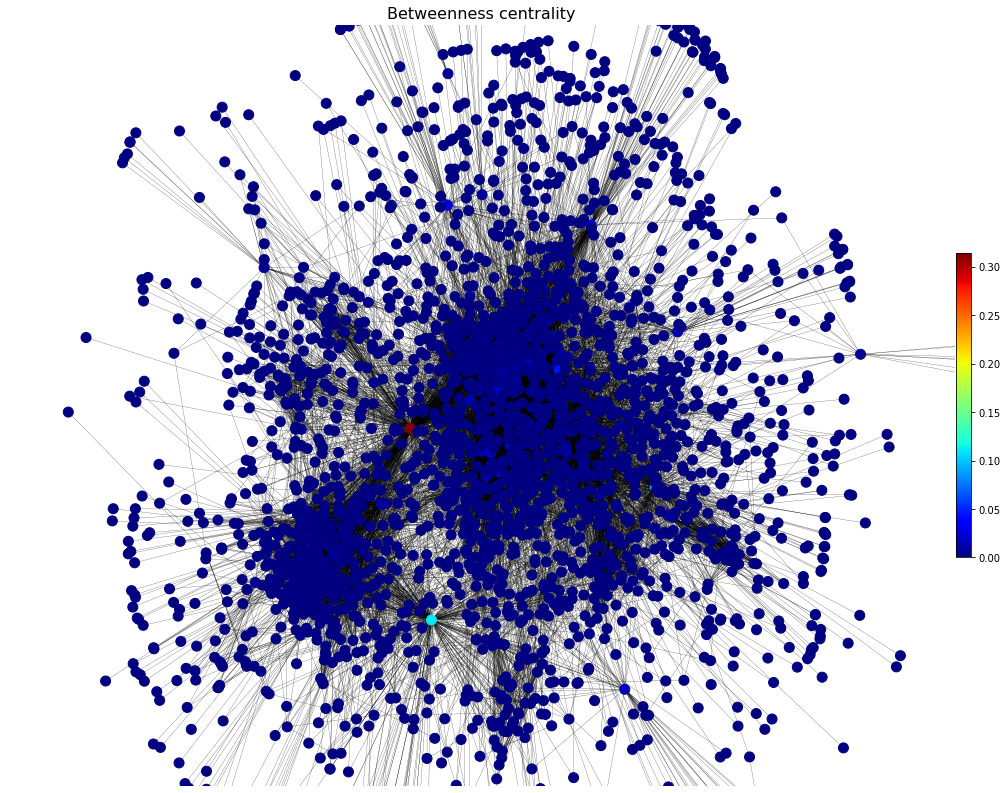

In [43]:
# Визуализируем
plt.figure(figsize=(20,14))
between_centr = nx.betweenness_centrality(Gc)
node_colors = list(between_centr.values())

nodes = nx.draw_networkx_nodes(Gc, pos = coord, 
                               node_color=node_colors,
                               node_size = 100,
                               nodelist=list(between_centr.keys()),
                               cmap = 'jet',
                               with_labels = False
                               )
edges = nx.draw_networkx_edges(Gc, pos = coord, width = .2)
plt.xlim([-.95, .9])
plt.ylim([-.5, .6])
plt.colorbar(nodes, shrink=.4, pad=.0005, aspect=20)
plt.title('Betweenness centrality', fontsize = 16)
plt.axis("off")

top_nodes = sorted(between_centr, key = between_centr.get)[-5:]

Closeness centrality

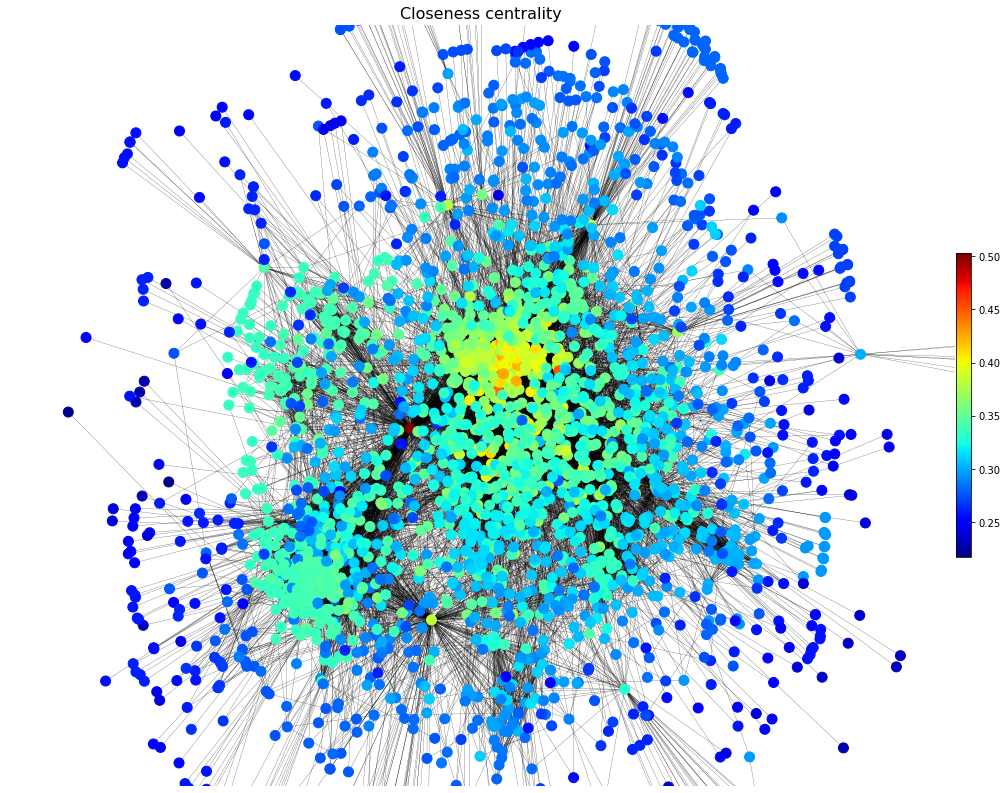

In [44]:
plt.figure(figsize=(20,14))
closeness_centr = nx.closeness_centrality(Gc)
node_colors = list(closeness_centr.values())

nodes = nx.draw_networkx_nodes(Gc, pos = coord, 
                               node_color=node_colors,
                               node_size = 100,
                               nodelist=list(closeness_centr.keys()),
                               cmap = 'jet',
                               with_labels = False
                               )
edges = nx.draw_networkx_edges(Gc, pos = coord, width = .2)
plt.xlim([-.95, .9])
plt.ylim([-.5, .6])
plt.colorbar(nodes, shrink=.4, pad=.0005, aspect=20)
plt.title('Closeness centrality', fontsize = 16)
plt.axis("off")

top_nodes = sorted(closeness_centr, key = closeness_centr.get)[-3:]

3.4 Print histogram with centralities distribution of your graph 

Histograms with centralities 

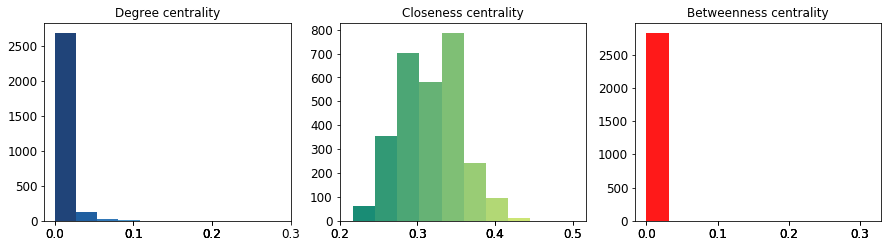

In [45]:
# гистограммы класетров
plt.figure(figsize=(15, 8))
plt.subplot(2, 3, 1)
plt.title("Degree centrality", y = 1.00)
plot_hist(data = list(degree_centr.values()), colormap = 'Blues_r', alpha = 0.9, bins = 10, round_value=1)

plt.subplot(2, 3, 2)
plt.title("Closeness centrality", y = 1.00)
plot_hist(data = list(closeness_centr.values()), colormap = 'summer', alpha = 0.9, bins = 10, round_value=1)

plt.subplot(2, 3,3)
plt.title("Betweenness centrality", y = 1.00)
plot_hist(data = list(between_centr.values()), colormap = 'autumn', alpha = 0.9, bins = 10)



In [46]:
# Degree centrality
dc = nx.degree_centrality(G_small)
# Closeness centrality
cc = nx.closeness_centrality(G_small)

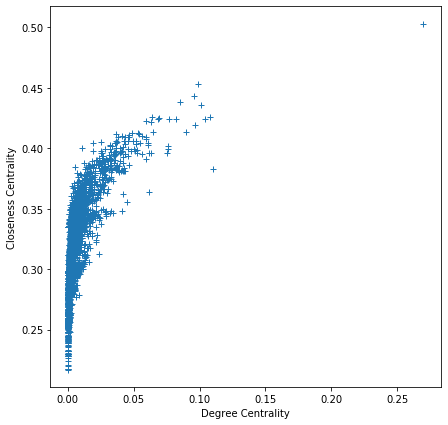

In [47]:
# Plot closeness vs degree centralities
xdata = list(dc.values())
ydata = list(cc.values())
plt.figure(1, figsize=(7,7))
plt.xlabel('Degree Centrality')
plt.ylabel('Closeness Centrality')
p=plt.plot(xdata,ydata, '+')

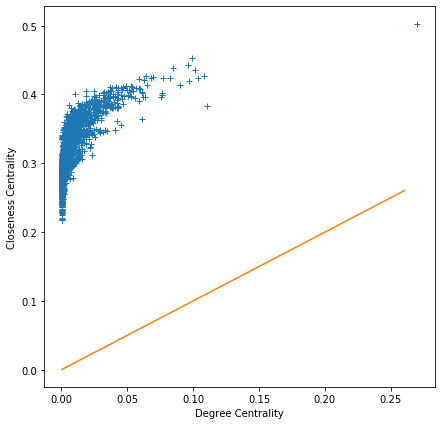

In [48]:
# Plot closeness vs degree centralities with an added line!
xdata = list(dc.values())
ydata = list(cc.values())
plt.figure(1, figsize=(7,7))
plt.xlabel('Degree Centrality')
plt.ylabel('Closeness Centrality')
p=plt.plot(xdata,ydata, '+')
x=np.arange(min(xdata),max(xdata),0.01)
p=plt.plot(x,x)

In [49]:
bc = nx.betweenness_centrality(G_small)

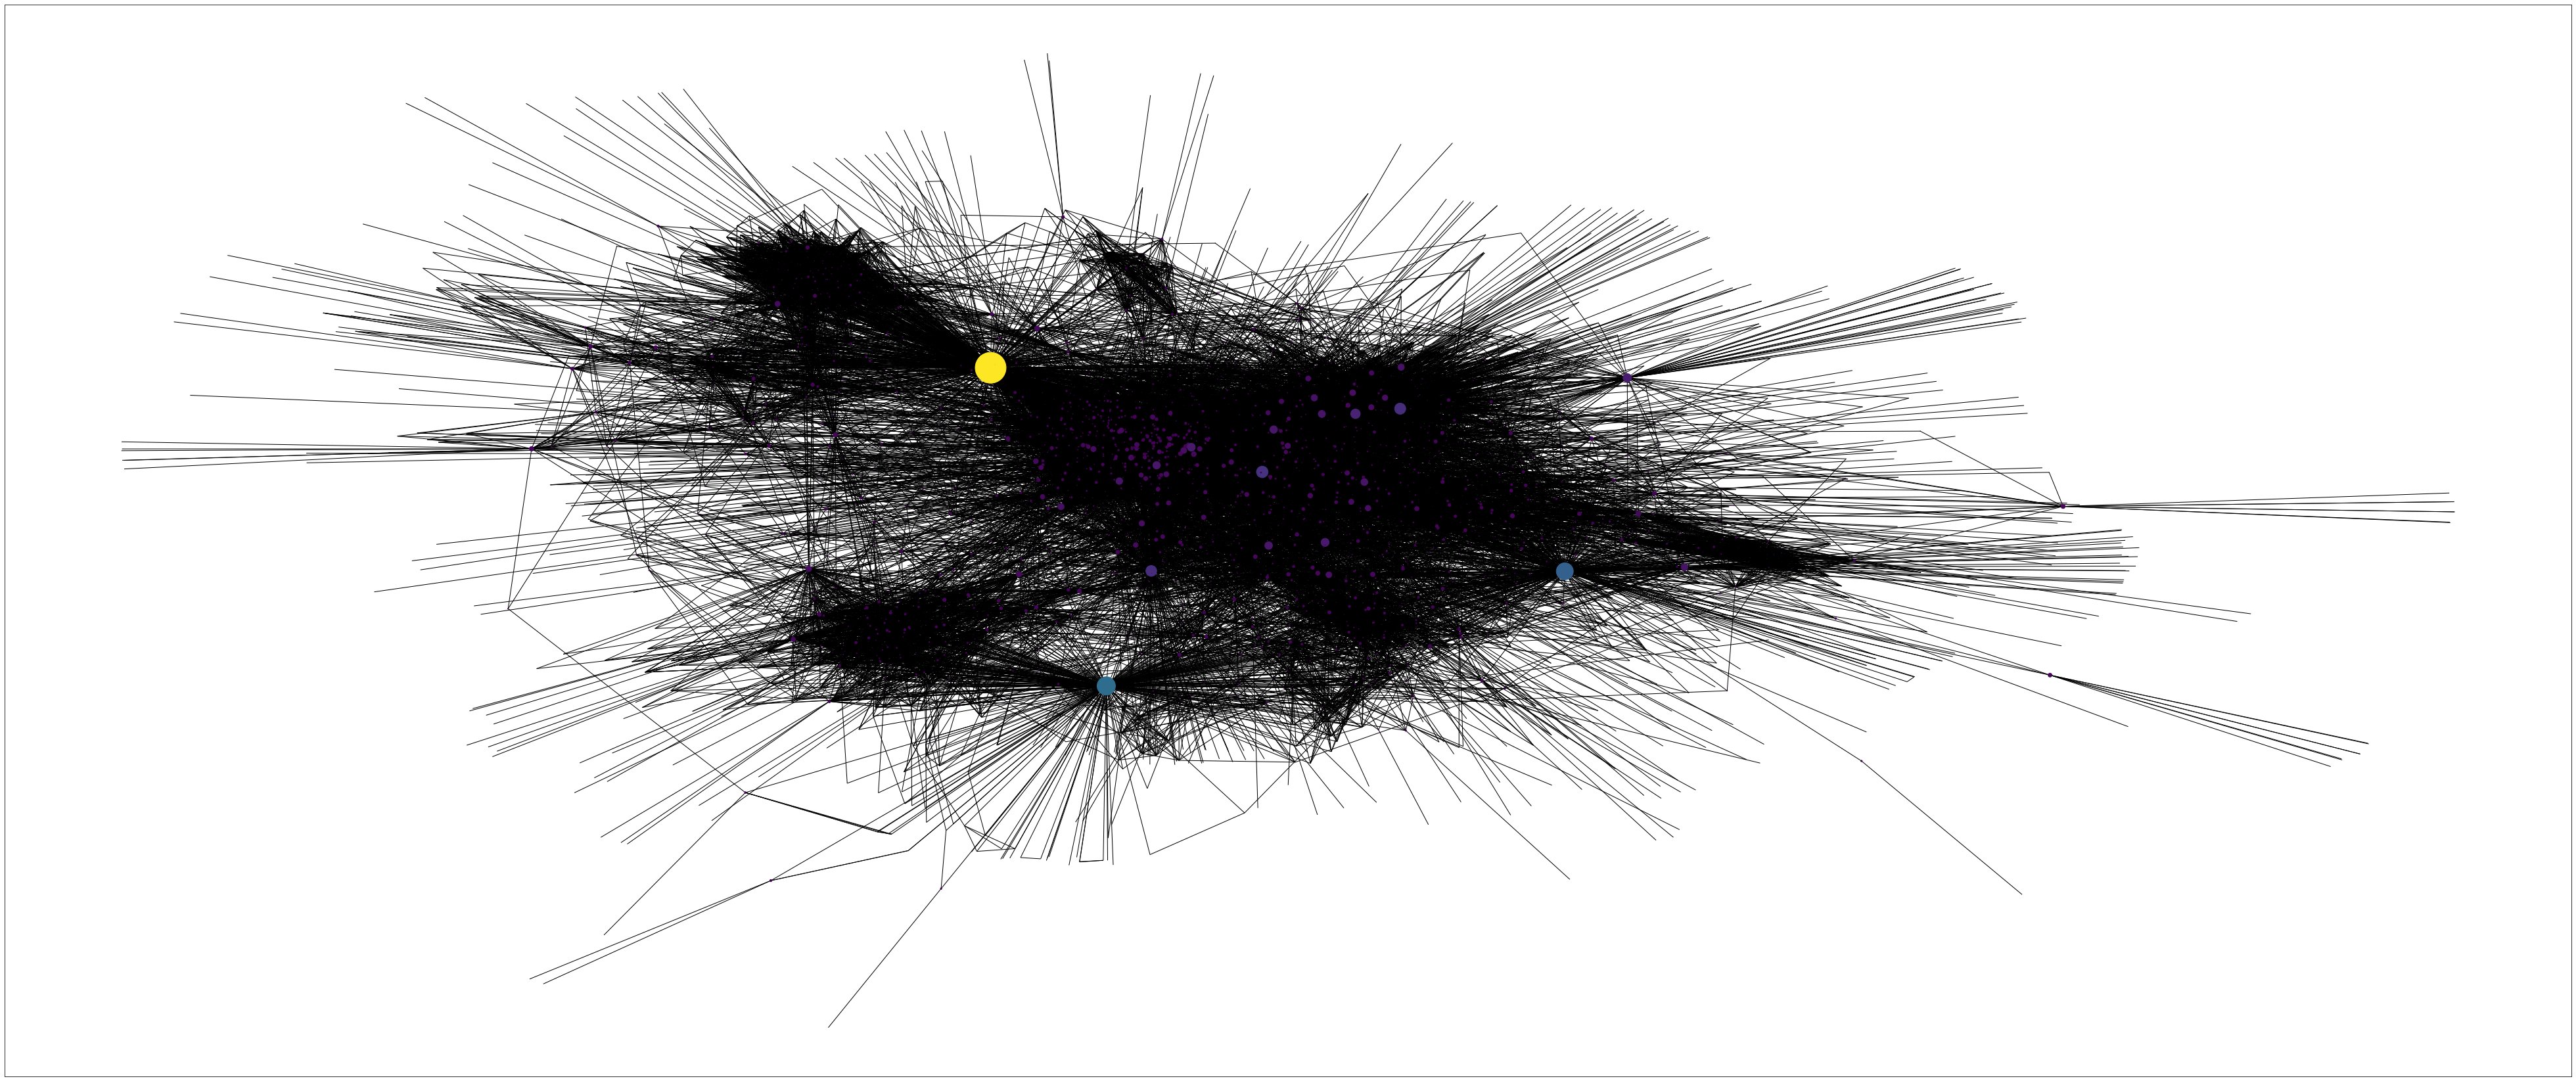

In [50]:
plt.figure(1, figsize=(70,30))
nx.draw_networkx(G_small,
          pos,
          nodelist=list(cc.keys()),
          node_size = [c*7000 for c in bc.values()],
          node_color=list(bc.values()),
          font_size=30,
          font_color='red',          
            with_labels=False
          )
plt.show()